In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_excel(r"C:\Users\sdkag\OneDrive\Documents\Research Project Dataset(AutoRecovered).xlsx",sheet_name='Sheet2',index_col ='month', parse_dates = True) 
data 

,Arrival(in ton),modal price,temprature,Rain Days,rainfall
month,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94
2010-02-01,19.938417,937.459645,38.333333,0,0.00
2010-03-01,24.788689,949.015482,40.555556,3,0.52
2010-04-01,24.663240,1008.844008,40.555556,2,44.99
2010-05-01,14.229670,1017.568627,38.333333,4,3.66
...,...,...,...,...,...
2024-05-01,21.294051,2537.236682,25.000000,1,47.08
2024-06-01,16.947092,2473.844760,25.000000,20,95.33
2024-07-01,13.303412,2480.717893,23.888889,32,53.53


In [3]:
# Ensure the index is in datetime format, if it's not already
data.index = pd.to_datetime(data.index)

# Extract month and year from the datetime index
data['month'] = data.index.month
data['year'] = data.index.year

# Now 'month' and 'year' are columns in the DataFrame
data.head()  # Check if the month and year extraction is successful

,Arrival(in ton),modal price,temprature,Rain Days,rainfall,month,year
month,,,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94,1,2010
2010-02-01,19.938417,937.459645,38.333333,0,0.00,2,2010
2010-03-01,24.788689,949.015482,40.555556,3,0.52,3,2010
2010-04-01,24.663240,1008.844008,40.555556,2,44.99,4,2010
2010-05-01,14.229670,1017.568627,38.333333,4,3.66,5,2010


In [4]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to the 'month' column to create a 'season' column
data['season'] = data['month'].apply(month_to_season)

# Drop the 'month' column if not needed anymore
data = data.drop(columns=['month'])

# View the DataFrame
data.head()

,Arrival(in ton),modal price,temprature,Rain Days,rainfall,year,season
month,,,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94,2010,Winter
2010-02-01,19.938417,937.459645,38.333333,0,0.00,2010,Winter
2010-03-01,24.788689,949.015482,40.555556,3,0.52,2010,Spring
2010-04-01,24.663240,1008.844008,40.555556,2,44.99,2010,Spring
2010-05-01,14.229670,1017.568627,38.333333,4,3.66,2010,Spring


In [5]:
# Assuming 'season' column is already in the DataFrame
# Use pd.get_dummies() to convert 'season' into multiple one-hot encoded columns
season_dummies = pd.get_dummies(data['season'], prefix='season')

# Concatenate the one-hot encoded season columns with the original data
data = pd.concat([data, season_dummies], axis=1)

# Now the 'season' column is encoded into separate binary columns like 'season_Winter', 'season_Spring', etc.
data.head()

,Arrival(in ton),modal price,temprature,Rain Days,rainfall,year,season,season_Autumn,season_Spring,season_Summer,season_Winter
month,,,,,,,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94,2010,Winter,False,False,False,True
2010-02-01,19.938417,937.459645,38.333333,0,0.00,2010,Winter,False,False,False,True
2010-03-01,24.788689,949.015482,40.555556,3,0.52,2010,Spring,False,True,False,False
2010-04-01,24.663240,1008.844008,40.555556,2,44.99,2010,Spring,False,True,False,False
2010-05-01,14.229670,1017.568627,38.333333,4,3.66,2010,Spring,False,True,False,False


In [6]:
# Define target variable (price) and exogenous variables (rainfall, temperature, Rain Days, and season dummies)
exogenous= pd.concat([data[['rainfall', 'temprature', 'Rain Days','modal price']]], axis=1)
target= data['Arrival(in ton)']


In [7]:
train_size = int(len(target) * 0.7)
train_target, test_target = target[:train_size], target[train_size:]
train_exog, test_exog = exogenous[:train_size], exogenous[train_size:]


In [8]:
arimax_order = (1, 1, 2)  # Modify based on your data
arimax_model = ARIMA(train_target, order=arimax_order, exog=train_exog)
arimax_model_fit = arimax_model.fit()


C:\Users\sdkag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sdkag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sdkag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sdkag\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
arimax_train_pred = arimax_model_fit.predict(start=1, end=len(train_target)-1, exog=train_exog[1:])

In [10]:
arimax_test_pred = arimax_model_fit.get_forecast(steps=len(test_target), exog=test_exog).predicted_mean

In [11]:
import numpy as np
arimax_train_pred = np.insert(arimax_train_pred, 0, 0)


In [12]:
train_combined = np.column_stack((arimax_train_pred, train_target, train_exog))
test_combined = np.column_stack((arimax_test_pred, test_target, test_exog))

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_combined)
test_scaled = scaler.transform(test_combined)


In [14]:
X_train, y_train = train_scaled[:, 0:3], train_scaled[:, 1]
X_test, y_test = test_scaled[:, 0:3], test_scaled[:, 1]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [15]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [16]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

C:\Users\sdkag\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predictions
lstm_train_pred = lstm_model.predict(X_train)
lstm_test_pred = lstm_model.predict(X_test)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - loss: 0.0900 - val_loss: 0.1222
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0950 - val_loss: 0.1153
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0795 - val_loss: 0.1086
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0750 - val_loss: 0.1021
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0694 - val_loss: 0.0958
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0590 - val_loss: 0.0896
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0798 - val_loss: 0.0836
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0600 - val_loss: 0.0778
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0494 - val_loss: 0.0721
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0554 - val_loss: 0.0666
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0485 - val_loss: 0.0614
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0418 - val_loss: 0.0566


In [18]:
lstm_train_pred = scaler.inverse_transform(np.column_stack((lstm_train_pred, np.zeros(len(lstm_train_pred)), np.zeros((len(lstm_train_pred), train_exog.shape[1])))))
lstm_test_pred = scaler.inverse_transform(np.column_stack((lstm_test_pred, np.zeros(len(lstm_test_pred)), np.zeros((len(lstm_test_pred), test_exog.shape[1])))))


In [19]:
lstm_train_pred = lstm_train_pred[:, 0]
lstm_test_pred = lstm_test_pred[:, 0]

In [20]:
train_rmse = np.sqrt(mean_squared_error(train_target, lstm_train_pred))
test_rmse = np.sqrt(mean_squared_error(test_target, lstm_test_pred))
train_mape = mean_absolute_percentage_error(train_target, lstm_train_pred)
test_mape = mean_absolute_percentage_error(test_target, lstm_test_pred)

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train MAPE: {train_mape}, Test MAPE: {test_mape}")


Train RMSE: 6.308082983090407, Test RMSE: 8.028866635000675
Train MAPE: 0.42893418641636566, Test MAPE: 0.46188148078691343


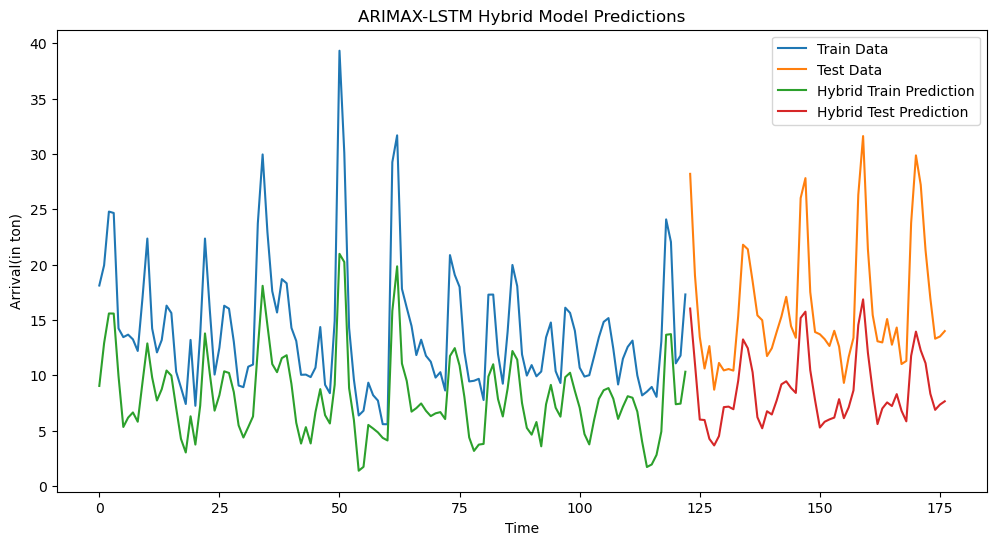

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(train_target)), train_target, label='Train Data')
plt.plot(range(len(train_target), len(target)), test_target, label='Test Data')
plt.plot(range(len(train_target)), lstm_train_pred, label='Hybrid Train Prediction')
plt.plot(range(len(train_target), len(target)), lstm_test_pred, label='Hybrid Test Prediction')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Arrival(in ton)")
plt.title("ARIMAX-LSTM Hybrid Model Predictions")
plt.show()